#### **4. Ridge Regression:**

* Ridge Regression (L2) is used when there is a problem of multicollinearity.

* This type of regularized linear regression adds a penalty to the loss function to shrink coefficient values toward zero to reduce the complexity of data.

* Ridge has a hyperparameter, $\lambda$, but often called alpha, that is set before training the model to control how the learning process works.

* The L2 refers to the L2 Norm (Euclidean Norm)

<br>

![Ridge Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Ridge%20Reg.JPG)

**4.1  Check for Multicollinearity in Regularized Regression**

The Variance Inflation Factor **(VIF)** is used to measure multicollinearity between independent variables when the coefficients are numeric and non-zero. 
- This is useful in fields such as Econometrics, Epidemiology, and Biostatistics.
- Regularized Regression (Ridge, Lasso, and ElasticNet) are designed to handle multicollinearity.

#### **5. Lasso Regression:**

* Lasso Regression (L1) is similar to ridge, but it also performs feature selection.

* Formally Least Absolute Shrinkage and Selection Operator (LASSO), it is another form of regularized linear regression.

* Instead of using an L2 penalty, Lasso uses L1 regularization: sum of absolute values of coefficients.

* It will set the coefficient value for features that do not help in decision making very low, potentially zero.

* Lasso also has a hyperparameter, $\lambda$, but often called alpha, that is set before training the model to control how the learning process works.

  ![Lasso Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lasso%20Reg.JPG)

* Lasso regression tends to exclude variables that are not required from the equation, whereas ridge tends to do better when all variables are present


#### **6. ElasticNet Regression:**

![ElasticNet Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/ElasticNet%20Reg.JPG)

#### **Use Cases: Ridge, Lasso, ElasticNet Regression for Training and Prediction:**

We are going to use the same dataset that we used in the previous use case at the time of training of "model2" i.e. inp3

**A. Ridge Regression:**

In [59]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [60]:
# Read the processed googleplaystore_cleaned.csv into a dataframe and print the first 5 rows.

df = pd.read_csv('googleplaystore_cleaned.csv')
df.head()

,Rating,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
0,4.1,5.075174,9.210440,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,6.875232,13.122365,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,11.379520,15.424949,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,12.281389,17.727534,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,6.875232,11.512935,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# Test, Train, Split

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 42)
df_train.shape, df_test.shape

((6219, 100), (2666, 100))

In [62]:
# Creating the target and input variables for the training set
# The target variable is 'Rating' and the input variables are all other columns.
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [63]:
display(X_train1.head(), y_train1.head())

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
5614,4.248495,9.210440,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6114,5.755742,9.210440,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5129,8.914895,13.122365,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2300,10.570342,15.424949,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5498,8.711773,11.512935,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


5614    3.0
6114    4.1
5129    4.3
2300    4.3
5498    4.7
Name: Rating, dtype: float64

In [64]:
# Creating the target and input variables for the test set
# The target variable is 'Rating' and the input variables are all other columns.
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [65]:
display(X_test1.head(), y_test1.head())

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
6226,4.779123,8.517393,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5404,11.955654,13.815512,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1569,10.317384,13.815512,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8498,2.397895,6.216606,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1127,12.587825,16.118096,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


6226    4.5
5404    4.7
1569    4.4
8498    4.9
1127    4.0
Name: Rating, dtype: float64

### Now we're ready to fit and evaluate our regularized models: Ridge, LASSO, and ElasticNet

In [66]:
# Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001)
ridgeReg.fit(X_train1,y_train1)


Ridge(alpha=0.001)

**Evaluating using RMSE:**

In [67]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, ridgeReg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, ridgeReg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test1, y_test1)))


0.4851651162320532
0.4757394851744034
R2 Value/Coefficient of Determination: 0.13904006811027636


**B. Lasso Regression:**

In [68]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train1,y_train1)


Lasso(alpha=0.001)

**Evaluating using RMSE:**

In [69]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, lassoreg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, lassoreg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test1, y_test1)))


0.4887349873519455
0.4780896781576956
R2 Value/Coefficient of Determination: 0.13051262823504828


**C. ElasticNet Regression:**

In [70]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
Elastic.fit(X_train1,y_train1)


ElasticNet(alpha=0.001)

**Evaluating using RMSE:**

In [71]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, Elastic.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, Elastic.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test1, y_test1)))


0.48696203881771
0.47692849620242966
R2 Value/Coefficient of Determination: 0.1347311127433123


## Regularized Linear Regression Observations

- We chose a relatively tiny $\alpha$ value, which will have a tiny impact on the predictions. If you're curious, go ahead and increase $\alpha$ and evaluate the results.
- The ElasticNet model gives similar train and test RMSE — no big overfit, but relatively low predictive power (R² ~ 0.14).
- Further tuning of the hyperparameter may yield better outcomes

---

### **Exercise:** Now that we know how to fit regularized linear regression models, try this excercise to hone your skills

* Perform the iteration of the model with Lasso, Ridge, and ElasticNet Regression by using the original dataset i.e., **inp0** as done in the case of Simple Linear Regression.

* Use the following metrics to evaluate the model:
  * RMSE
  * MAPE
  * $R^2$ error

---

## **Cost Function:**
- A cost function (also called a loss function) is a function that evaluates a model's performance for a given dataset.

- It evaluates and expresses the error between predicted values and expected values as a single, real number.

> __GOAL__ Find parameter values that minimize the cost function (i.e., make predictions as close as possible to actual values).

### **Gradient:**

- A gradient is a measurement of how much a function's output varies as its inputs are changed.

## **Gradient Descent:**

- Gradient descent is the algorithm used to minimize the cost function.

- It's an optimization algorithm to discover the local minimum of a differentiable function or feature by computing partial derivatives of the cost function with respect to each parameter

- We use gradient descent to update the parameters of our model. 

- In linear regression, parameters correspond to coefficients, and in neural networks, parameters correspond to weights.

- The gradient descent equation is as follows:

![GD](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/GD.png)

### This process shows how you move from the cost function to its gradient, using partial derivatives.

- Start with the cost function derivative.
- Apply the chain rule for partial derivatives to take the partial derivative of the cost function $J$ with respect to the parameter $\theta$.
- Yield the gradient expression, which drives parameter updates in gradient descent.

### **Types of Gradient Descent:**

Gradient descents are divided into three categories, which vary primarily in the amount of data they use. These categories are:

1. Batch Gradient Descent (BGD)
2. Stochastic Gradient Descent (SGD) 
3. Mini-Batch Gradient Descent (Mini BGD)


#### **1. Batch Gradient Descent (BGD):**

- Batch gradient descent (BGD), also known as vanilla gradient descent, measures the error for each example in the training dataset, but the model is updated only after all of the training examples have been evaluated.

- This whole process is referred to as a training epoch because it resembles a loop.

- For each gradient descent iteration, it processes all the training samples. However, batch gradient descent is computationally very expensive when the number of training examples is high.

- Thus, if the number of training examples is high, we tend to use stochastic gradient descent (SGD) or mini-batch gradient descent (Mini BGD) instead.

#### **2. Stochastic Gradient Descent (SGD):**

- Stochastic gradient descent (SGD) is a form of gradient descent that processes one **random** training example per iteration.

- It estimates the error for each example in the training dataset and updates the parameters one by one.

- Based on the problem statement, batch gradient descent (BGD) can be much faster because the parameters are modified even after an iteration in which only a single example has been processed.

- One advantage is that the frequent updates allow us to track our progress in great detail.

- However, even if the number of training examples is high, it can only process one of them, which will add to the system's overhead and the number of iterations needed.

#### **3. Mini-Batch Gradient Descent (Mini BGD):**

- Mini-batch gradient descent (Mini BGD) combines the principles of stochastic gradient descent (SGD) and batch gradient descent (BGD) and is faster than both.

- It divides the training dataset into small batches and updates each of those batches. This establishes a balance between the robustness of stochastic gradient descent (SGD) and the efficiency of batch gradient descent (BGD).

- It is compatible with both larger and smaller training examples.


---

### Compare Multiple Linear Regression with Stochastic Gradient Descent

## <b>Case Study: Multiple Linear Regression Modeling Of Diabetes Progression</b>


#### <b> Importing Required Libraries </b>
> NOTE: you may need to install tabulate before running the code below. `conda install -c conda-forge tabulate -y`

In [72]:
# Importing libraries
import numpy as np
import pandas as pd

from tabulate import tabulate

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score


import matplotlib.pyplot as plt

#### <b> Load the Data</b>

In [73]:
# Load the data dictionary for the diabetes dataset from sklearn.datasets
diabetes = load_diabetes()

# Find the dict keys
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


#### <b> Dataset Description</b>

In [74]:
# Show the diabetes dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### <b> Find Features and Target</b>

Let us split the data into **test** and **train.**

In [75]:
X = diabetes.data     # input features
Y = diabetes.target   # target feature, trying to predict diabetes progression

#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### <b>Find Feature's Name</b>

In [76]:
columns = diabetes.feature_names
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [77]:
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df.columns = columns
diabetes_df["disease_progression"] = Y

In [78]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [79]:
print(diabetes_df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

### <b> Standardizing Data</b>
- Many models perform better when features are on similar scales.
- Without scaling, features like `s6` might dominate due to larger values compared to other features.

Let us standardize the **test** and **train** data using the **StandardScaler()** function.

In [80]:
# Fit and transform the data using StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
# Create a DataFrame for the training data
train_data=pd.DataFrame(x_train)
train_data['disease_progression']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,disease_progression
0,-0.307969,-0.886638,-0.726771,-0.503567,0.680437,0.339576,2.245972,-0.834738,-1.462965,-1.643744,52.0
1,-1.443559,-0.886638,-0.064855,-0.797622,-1.387362,-1.645172,1.177576,-1.620140,-1.067466,-0.685575,61.0
2,-0.913617,-0.886638,-1.000668,-0.356539,-0.008830,-0.347951,1.506313,-0.834738,-0.507862,0.446807,111.0


In [82]:
# Create an array for the test data, for simplicity and performence
x_test = np.array(x_test)
y_test = np.array(y_test)

In [83]:
# Shape of test and train data metrics to ensure they can be used in model training
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(309, 10)
(309,)
(133, 10)
(133,)


**This is a good opportunity to calculate the Variance Inflation Factor to test for multicollinearity.**

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming diabetes_df is already defined and includes numeric columns + target
X_vif = diabetes_df.drop(columns=["disease_progression"])  # drop target variable

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display sorted
vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
4,s1,59.202510
5,s2,39.193370
6,s3,15.402156
8,s5,10.075967
7,s4,8.890986
2,bmi,1.509437
9,s6,1.484623
3,bp,1.459428
1,sex,1.278071
0,age,1.217307


**How to interpret VIF**

- VIF = 1,       No multicollinearity
- VIF = 1-5,     Moderate, generally acceptable
- VIF > 5 or 10, High multicollinearity, consider addressing

**Observation**

- Half of the "independent" variables exhibit high, and higher, multicollinearity, suggesting we use regularization techniques to address them.

Now we can fit using **MLR** and evaluate our model with **R-Squared**, **Linear Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [85]:
print("Multiple Linear Regression: Diabetes Progression")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_y_pred = lin_reg.predict(x_test)

lin_r2 = lin_reg.score(x_test, y_test)
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(lin_mse)

print("R-squared:", lin_r2)
print("MAE:", lin_mae)
print("MSE:", lin_mse)
print("RMSE:", lin_rmse)
print()

Multiple Linear Regression: Diabetes Progression
R-squared: 0.5702295941064468
MAE: 41.73485655858957
MSE: 2697.7947635111573
RMSE: 51.94029999442781



### Does This Taste Funny?
- In medical data, $R^2$ around 0.5 is "not bad" - disease progression is influenced by many unmeasured factors (lifestyle, genetics, medications).
- The error metrics give you a benchmark. The next step might be to compare these metrics across models (e.g. Ridge, Lasso, ElasticNet), but we just learned about gradient descent, so let's try that.

Let us plot a graph of the **Actual vs. Predicted Target**.

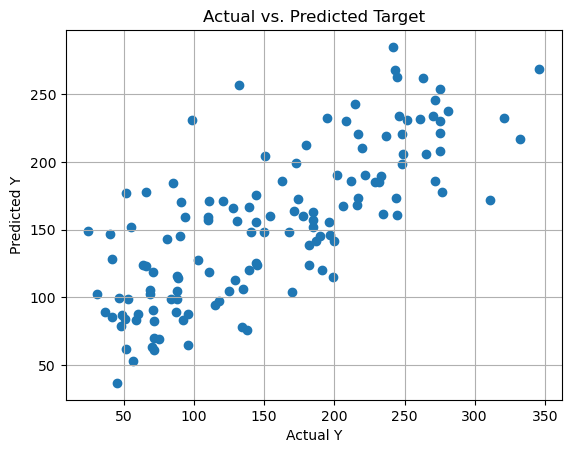

In [86]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

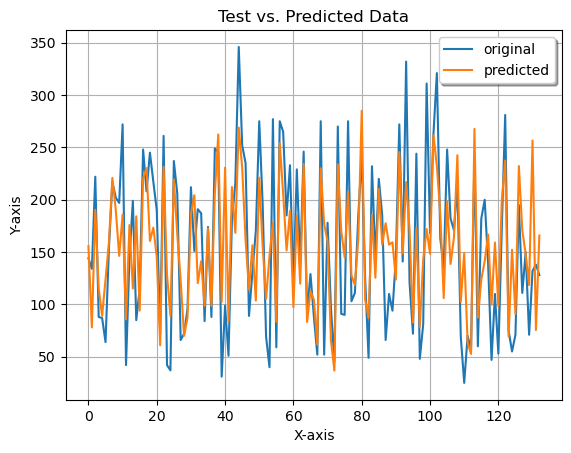

In [87]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lin_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b>Now Let's Model Using Stochastic Gradient Descent</b>

Let us calculate **R-squared**, **SGD Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [88]:
print("SGD Regression: Diabetes Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)

sgd_y_pred = sgd_reg.predict(x_test)

sgd_r2 = sgd_reg.score(x_test, y_test)
sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = np.sqrt(sgd_mse)

print("R-squared:", sgd_r2)
print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression: Diabetes Prediction
R-squared: 0.566176541933099
MAE: 41.92645645436019
MSE: 2723.2369595757314
RMSE: 52.1846429476693



### Does This Taste Less Funny?
- These results are nearly identical to ordinary linear regression

So, why use SGD?
- SGD sclaes better to huge datasets
- More flexible than linear regression
- Faster training when data doesn't fit into memory

Let us plot a graph of the **Actual vs. Predicted Target**.

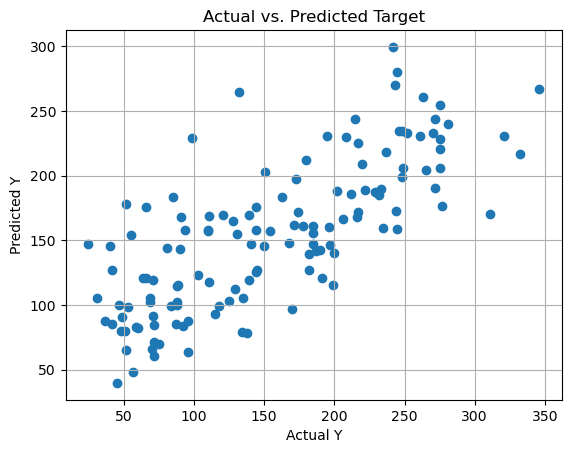

In [89]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

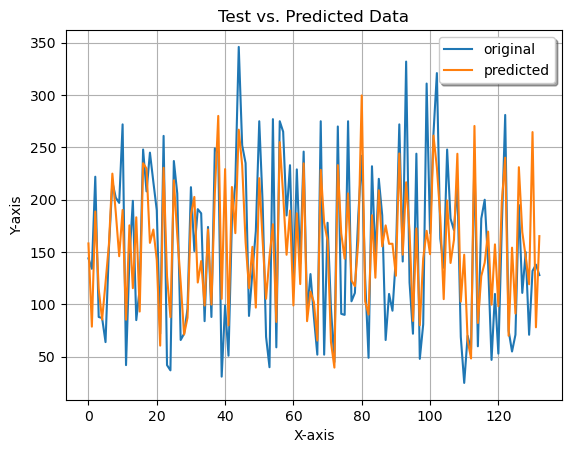

In [90]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> Model Comparison</b>

Let's compare our simple linear regression model with our SGD model:

**1. Evaluation Matrix Comparison**

In [91]:
# Performing evaluation matrix comparison
model_table = pd.DataFrame(columns = ["Comparison Matrix", "MLR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["R2 Score", "MAE", "MSE", "RMSE"]
model_table["MLR Model"] = [lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

NameError: name 'lin_score' is not defined

**2. Prediction Comparison - A: Scatter Plot**

Let us perform a comparison of the **Actual vs. Predicted Target** for the **Scatter Plot**.

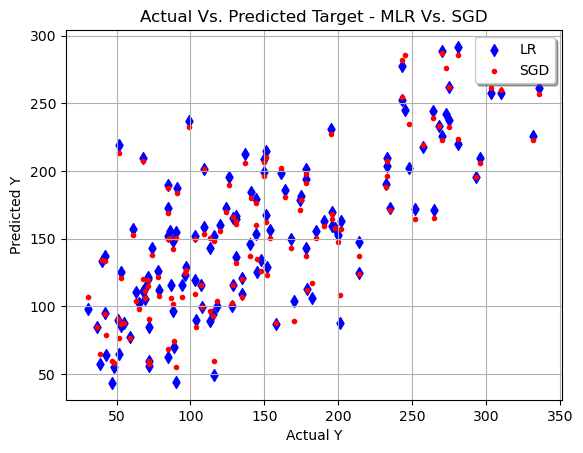

In [ ]:
plt.scatter(y_test, lin_y_pred, c="b", marker="d", label='LR')
plt.scatter(y_test, sgd_y_pred, c="r", marker=".", label='SGD')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual Vs. Predicted Target - MLR Vs. SGD')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()
plt.show()

**3. Prediction Comparison - B: Line Graph**

Let us perform a comparison of **MLR vs. SGD Prediction** for the **Line Graph**.

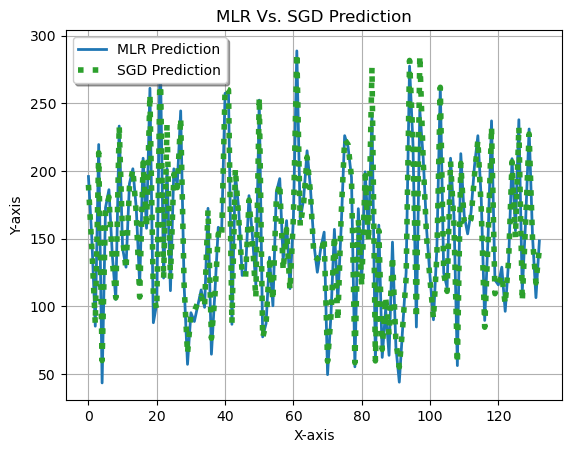

In [ ]:
x_ax = range(len(sgd_y_pred))
plt.plot(x_ax, lin_y_pred, c="C0", linestyle="-", linewidth = 2, label="MLR Prediction")
plt.plot(x_ax, sgd_y_pred, c="C2", linestyle=":", linewidth = 4, label="SGD Prediction")
plt.title("MLR Vs. SGD Prediction")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**4. Prediction Comparison - C: Target Prediction Table**

Let us compare the **MLR Predicted value** and **SGD Predicted value**.


In [ ]:
prediction_table = pd.DataFrame(columns=["MLR Predicted Value", "SGD Predicted Value"])
prediction_table["MLR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred

print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+-----+-----------------------+-----------------------+
|     | MLR Predicted Value   | SGD Predicted Value   |
|-----+-----------------------+-----------------------|
| 0   | 195.965               | 189.808               |
| 1   | 149.806               | 142.925               |
| 2   | 85.3522               | 87.1164               |
| 3   | 219.626               | 213.522               |
| 4   | 43.4164               | 59.9317               |
| 5   | 173.029               | 169.456               |
| 6   | 186.24                | 180.845               |
| 7   | 137.512               | 133.354               |
| 8   | 105.187               | 106.299               |
| 9   | 233.268               | 233.519               |
| 10  | 142.807               | 150.239               |
| 11  | 128.961               | 127.111               |
| 12  | 190.714               | 188.221               |
| 13  | 201.701               | 201.384               |
| 14  | 172.426               | 168.876         

### What is the difference between __Simple Linear Regression__ and __Multiple Linear Regression__ ?

As we discussed earlier, mlr models the relationship between one independent variable and the dependent variable as a straight line: $y = mx + b$

However, MLR models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.

The equation for Multiple Linear Regression:

 $$ {y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $$

- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.





### To compare SLR and MLR, let's use a simple dataset with only 3 input variables and 1 target.

#### Step 1: Import the Required Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Read the dataset `Advertising.csv`from statlearning.com. This dataset provides media ad spend data for TV, radio, and newspaper, as well as the sales attributed to that media spend.


In [2]:
url = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(url, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Display a summary of the DataFrame, including the column names, non-null count, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


__Observation:__
- There are no null objects.

**Train and test the model**

### Fit the SLR Model

- Select one feature and the target variable.
- Here, X is assigned to the `TV` input feature.

- y is assigned as the target variable.

In [4]:
# Extract the input features from the DataFrame, use double brackets to keep it as a DataFrame
X_slr = data[['TV']]

# Extract the target variable from the DataFrame, use double brackets to keep it as a DataFrame
y_slr = data[['sales']]

display(X_slr.shape, y_slr.shape)

(200, 1)

(200, 1)

**Perform train-test split**


In [5]:
# Import train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

Allowed inputs in `train_test_split()` are lists, numpy arrays, scipy-sparse matrices or pandas dataframes. In this implementation X and y will be passed as arrays of corresponding values

In [6]:
# Split the data into training and testing sets
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, test_size=0.3, random_state=42)

This code splits the dataset (X, y) into a training set (70%) and a test set (30%).

As you may have noticed, we’ve been setting the random_state parameter in our examples. This parameter is the seed used by the random number generator. Setting a seed ensures that the splits you generate are reproducible. If you don’t set a seed, you might get different splits every time you run the code, which can make your results hard to replicate.
it

- First, let us see if simple linear regression works on this data.
- From **sklearn.linear_model**, import the linear regression function.
- Assign **LinearRegression()** to the variable **lin_reg**.
- Next, fit the data on the training data `X_train` and `y_train`.

In [7]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression
# Create an instance of the LinearRegression class
lin_reg_slr = LinearRegression()
lin_reg_slr.fit(X_train_slr,y_train_slr)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Predict SLR test set

In [8]:
y_pred_slr = lin_reg_slr.predict(X_test_slr)

**Plot the test data and predicted linear regression line in a scatter plot**

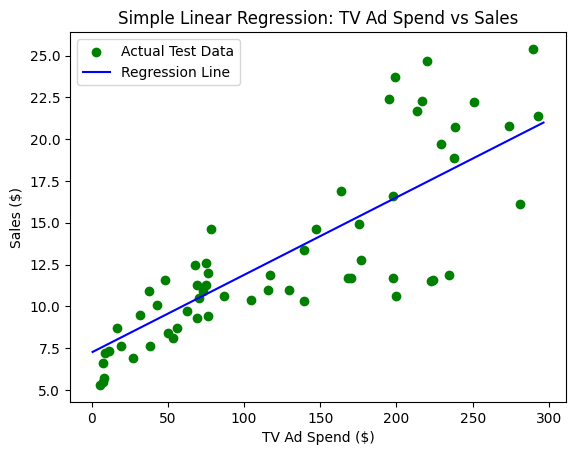

In [9]:
# Scatter actual test points
plt.scatter(X_test_slr, y_test_slr, color='green', label='Actual Test Data')

# Plot regression line over training data range
plt.plot(
    X_train_slr.sort_values(by='TV'),
    lin_reg_slr.predict(X_train_slr.sort_values(by='TV')),
    color='blue',
    label='Regression Line'
)

plt.title('Simple Linear Regression: TV Ad Spend vs Sales')
plt.xlabel('TV Ad Spend ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()



__Observation:__
- The plot shows a positive linear relationship between Sales and TV, where the blue regression line indicates the model's predictions. The green data points are generally close to the line, suggesting the model fits the data reasonably well, though some variability exists, and variability increases as spend increases.

### Overfitting and Underfitting

When developing machine learning models, achieving the right balance between complexity and simplicity is crucial. This balance is covered in the concepts of overfitting and underfitting.

**Overfitting**

- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data.
- Sign: High accuracy on training data but poor accuracy on test data.
- Cause: Model is too complex (too many parameters).

**Underfitting**
- Underfitting happens when a model is too simple to capture the underlying pattern of the data.
- Sign: Poor accuracy on both training and test data.
- Cause: Model is too simple (too few parameters).
  
**Bias-Variance Tradeoff**
- Bias: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.
- Variance: Error due to excessive complexity in the learning algorithm. High variance can cause overfitting.

**Tradeoff**
- Low Bias & High Variance: Model fits the training data very well but may fail to generalize (overfitting).
- High Bias & Low Variance: Model does not fit the training data well and misses the underlying trend (underfitting).
- Optimal Tradeoff: Finding a balance where the model performs well on both training and test data, minimizing overall error.
  
Understanding and managing the bias-variance tradeoff is key to building models that generalize well to unseen data.

**Let's look at how to check for overfitting or underfitting of the SLR model**

In [10]:
# Import necessary libraries for performance metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Predicting for the training set
y_train_pred_slr = lin_reg_slr.predict(X_train_slr)

# Predicting for the test set
y_test_pred_slr = lin_reg_slr.predict(X_test_slr)

mse_train_slr = mean_squared_error(y_train_slr, y_train_pred_slr)
mse_test_slr = mean_squared_error(y_test_slr, y_test_pred_slr)
rmse_train_slr = np.sqrt(mse_train_slr)
rmse_test_slr = np.sqrt(mse_test_slr)
r2_train_slr = r2_score(y_train_slr, y_train_pred_slr)
r2_test_slr = r2_score(y_test_slr, y_test_pred_slr)

# Print the metrics
print("Training Set Mean Squared Error:", mse_train_slr)
print("Test Set Mean Squared Error:", mse_test_slr)
print("Training Set Root Mean Squared Error:", rmse_train_slr)
print("Test Set Root Mean Squared Error:", rmse_test_slr)
print("Training Set R² Score:", r2_train_slr)
print("Test Set R² Score:", r2_test_slr)
print("------------------------------------------")
# Check for overfitting or underfitting
if mse_train_slr < mse_test_slr or r2_train_slr > r2_test_slr:
    if abs(r2_train_slr - r2_test_slr) > 0.1:
        print("Model may be overfitting to the training data.")
    else:
        print("Model performs reasonably well but check for slight overfitting.")
elif mse_train_slr > mse_test_slr and r2_train_slr < r2_test_slr:
    print("Model may be underfitting, consider increasing model complexity.")
else:
    print("Model has a balanced fit on both training and testing datasets.")

Training Set Mean Squared Error: 11.189103289351676
Test Set Mean Squared Error: 8.970991242413614
Training Set Root Mean Squared Error: 3.3450117024237263
Test Set Root Mean Squared Error: 2.9951613049072354
Training Set R² Score: 0.5736021199591975
Test Set R² Score: 0.6714477229302764
------------------------------------------
Model may be underfitting, consider increasing model complexity.


**Observation**

 Mean Squared Error (MSE) and R-squared (R²) values are calculated for both training and test datasets.

 - MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
 - R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model


Underfitting: The model performs poorly on both training and test data, or better on the test data compared to the training data, which could suggest that the model is too simple.


### Fit the MLR Model

- Select all input variables, TV, radio, and newspaper
- Select the target variable, sales

In [11]:
# Extract the input features from the DataFrame, use double brackets to keep it as a DataFrame
X_mlr = data[['TV', 'radio', 'newspaper']]

# Extract the target variable from the DataFrame, use double brackets to keep it as a DataFrame
y_mlr = data[['sales']]

display(X_mlr.shape, y_mlr.shape)

(200, 3)

(200, 1)

- Perform test, train split

In [12]:
# Split the data into training and testing sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.3, random_state=42)

- Instantiate the LinearRegression class, and fit the model.
- The LinearRegression class will handle both SLR and MLR, based on the arguments.


In [13]:
# Create an instance of the LinearRegression class, and fit the model to the training data
lin_reg_mlr = LinearRegression()
lin_reg_mlr.fit(X_train_mlr,y_train_mlr)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Acquire the predicted regression on the test set 

In [14]:
y_pred_mlr = lin_reg_mlr.predict(X_test_mlr)

**Plot the test data and perfect predicted linear regression line in a scatter plot**

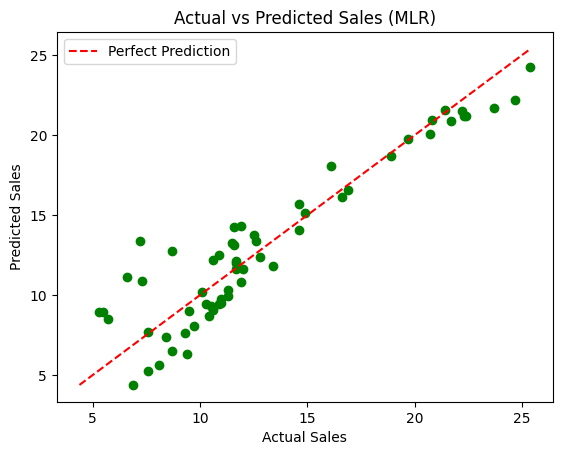

In [18]:
plt.scatter(y_test_mlr, y_pred_mlr, color='green')

min_val = min(y_test_mlr.values.flatten().min(), y_pred_mlr.flatten().min())
max_val = max(y_test_mlr.values.flatten().max(), y_pred_mlr.flatten().max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
#slr line overlap
#min_val_slr = min(y_test_slr.values.flatten().min(), y_pred_slr.flatten().min())
#max_val_slr = max(y_test_slr.values.flatten().max(), y_pred_slr.flatten().max())
#plt.plot([min_val_slr, max_val_slr], [min_val_slr, max_val_slr], color='blue', linestyle='--', label='SLR Prediction')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (MLR)")
plt.legend()
plt.show()


- Evaluate the MLR model against the test set

In [19]:
print("R²:", r2_score(y_test_mlr, y_pred_mlr))
print("MSE:", mean_squared_error(y_test_mlr, y_pred_mlr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_mlr, y_pred_mlr)))
print("Explained Variance Score:", explained_variance_score(y_test_mlr, y_pred_mlr))

R²: 0.8609466508230368
MSE: 3.79679723671522
RMSE: 1.9485372043446387
Explained Variance Score: 0.8610009053814289


- Now evaluate the MLR model for overfitting and underfitting

In [20]:
# Predicting for the training set
y_train_pred_mlr = lin_reg_mlr.predict(X_train_mlr)

# Predicting for the test set
y_test_pred_mlr = lin_reg_mlr.predict(X_test_mlr)

mse_train_mlr = mean_squared_error(y_train_mlr, y_train_pred_mlr)
mse_test_mlr = mean_squared_error(y_test_mlr, y_test_pred_mlr)
rmse_train_mlr = np.sqrt(mse_train_mlr)
rmse_test_mlr = np.sqrt(mse_test_mlr)
r2_train_mlr = r2_score(y_train_mlr, y_train_pred_mlr)
r2_test_mlr = r2_score(y_test_mlr, y_test_pred_mlr)

# Print the metrics
print("Training Set Mean Squared Error:", mse_train_mlr)
print("Test Set Mean Squared Error:", mse_test_mlr)
print("Training Set Root Mean Squared Error:", rmse_train_mlr)
print("Test Set Root Mean Squared Error:", rmse_test_mlr)
print("Training Set R² Score:", r2_train_mlr)
print("Test Set R² Score:", r2_test_mlr)
print("------------------------------------------")
# Check for overfitting or underfitting
if mse_train_mlr < mse_test_mlr or r2_train_mlr > r2_test_mlr:
    if abs(r2_train_mlr - r2_test_mlr) > 0.1:
        print("Model may be overfitting to the training data.")
    else:
        print("Model performs reasonably well but check for slight overfitting.")
elif mse_train_mlr > mse_test_mlr and r2_train_mlr < r2_test_mlr:
    print("Model may be underfitting, consider increasing model complexity.")
else:
    print("Model has a balanced fit on both training and testing datasets.")

Training Set Mean Squared Error: 2.4793551789057866
Test Set Mean Squared Error: 3.79679723671522
Training Set Root Mean Squared Error: 1.574596830590544
Test Set Root Mean Squared Error: 1.9485372043446387
Training Set R² Score: 0.9055159502227753
Test Set R² Score: 0.8609466508230368
------------------------------------------
Model performs reasonably well but check for slight overfitting.


**Compare Performance: SLR v. MLR**


In [21]:
# === Compute metrics for SLR ===
r2_slr = r2_score(y_test_slr, y_pred_slr)
mse_slr = mean_squared_error(y_test_slr, y_pred_slr)
mae_slr = mean_absolute_error(y_test_slr, y_pred_slr)

# === Compute metrics for MLR ===
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)
mae_mlr = mean_absolute_error(y_test_mlr, y_pred_mlr)

# === Create DataFrame ===
metrics_df = pd.DataFrame({
    'Metric': ['R²', 'MSE', 'MAE'],
    'SLR': [r2_slr, mse_slr, mae_slr],
    'MLR': [r2_mlr, mse_mlr, mae_mlr]
})

# Round for cleaner display
metrics_df[['SLR', 'MLR']] = metrics_df[['SLR', 'MLR']].round(3)
display(metrics_df)


,Metric,SLR,MLR
0,R²,0.671,0.861
1,MSE,8.971,3.797
2,MAE,2.276,1.512


**Observations***

- Clear gain in explanatory power by adding variables.
- Both MSE and MAE error metrics are lower for MLR → the model predictions are more accurate overall
- The extra variables (Radio, Newspaper) contribute useful signal to predicting Sales.

## __Non-linear Regression__

### __Polynomial Regression__

**Polynomial Regression** is a subset of linear regression that includes polynomial terms.
The relationship between an independent variable (x) and a dependent variable (y) is modeled as an nth-degree polynomial.



![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Polynomial.png)

- Polynomial regression is also known as the special case of multiple linear regression. Some polynomial terms are added to the multiple linear regression equation to convert into polynomial regression.
- It is a linear model with some modifications made to increase its accuracy.
- The dataset used in polynomial regression for training is non-linear.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/linear__regression.png)

- The figure above, illustrates that the straight line is unable to capture the patterns in the given data.
- To achieve a higher-order equation that captures complex data patterns, the powers of the original features can be added as new features.


The following graph is the result after applying polynomial regression:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/polynomial__regression.png)

- It provides the best approximation of the relationship between a dependent and an independent variable.
- It captures most data points and decreases the error between the actual and the predicted values.

### Let us see how to fit polynomial regression on a dataset.


- First, import the relevant libraries.
- Next, assign the **PolynomialFeatures** of appropriate degree to the variable **poly_features**.
- Fit the values of X_test and X_train  and assign them to the variable **X_test_poly** and **X_train_poly**.
- Finally, get the linear regression function and assign it to the variable **pol_features**.
- Dataset used for this exercise is `mpg` from seaborn.

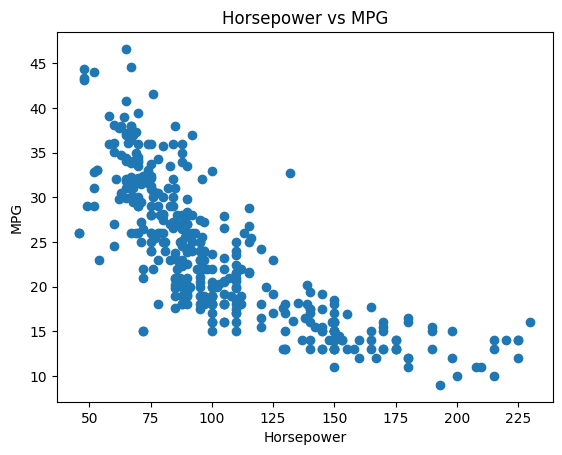

In [22]:
# Load the dataset and drop rows with missing values
df = sns.load_dataset('mpg').dropna()

# Assign the input and target variables
# Here, 'horsepower' is the input feature and 'mpg' is the target
X = df[['horsepower']]   # use double brackets to format it as a DataFrame (we need 2D features for polynomial regression)
y = df[['mpg']]

# Plot the variables
plt.scatter(X, y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
plt.show()


**Observations**

- We can see a curve in the relationship between `horsepower` and `mpg`.
- Based on the curve, we appear to have a quadratic, perhaps even a degree 3 (if only we could see more of the curve), relationship.
- Linear regression will underperform on this dataset due to the polynomial relationship.

In [23]:
# Import the PolynomialFeatures class from scikit-learn's preprocessing module
from sklearn.preprocessing import PolynomialFeatures

- Perform train-test split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Fit the X_train_poly and y_train in the model.

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


> *Yes*: we still use the LinearRegression class object to perform linear regression on the coefficients.

- LinearRegression is not about the shape of the curve — it’s about the linearity of the equation in the coefficients.
- Polynomial regression = linear regression on transformed features.

Is $y$ still just a sum of coefficients × features? Yes. So we’re still using a linear model — just on transformed features.

Steps to Perform Polynomial Regression

1. **Create Polynomial Features:** The PolynomialFeatures transformer is configured to generate polynomial features up to the 4th degree.

2. **Transform Training Data:** fit_transform is used on X_train to generate a new feature set that includes polynomial features and interactions.

3. **Transform Test Data:** transform is used on X_test to apply the same transformation derived from X_train.

4. **Train the Model:** The linear regression model is trained using the transformed training data (X_train_poly) and the target values (y_train).

__Observation:__
- You have fitted the polynomial regression on the given data.

Next Step: Predict the values using the model.

In [26]:
# Predict on the testing set
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

- Create a variable **X_range** to create a continuous range of values for the independent variable (X) that spans from the minimum to the maximum values found in both the training and test datasets. This range is used to generate smooth predictions for plotting the polynomial regression curve.



In [27]:
X_range = np.arange(min(np.min(X_train), np.min(X_test)), max(np.max(X_train), np.max(X_test)), 0.1)
X_range = pd.DataFrame(X_range, columns=X_train.columns) # create a DataFrame for the range to match the input format

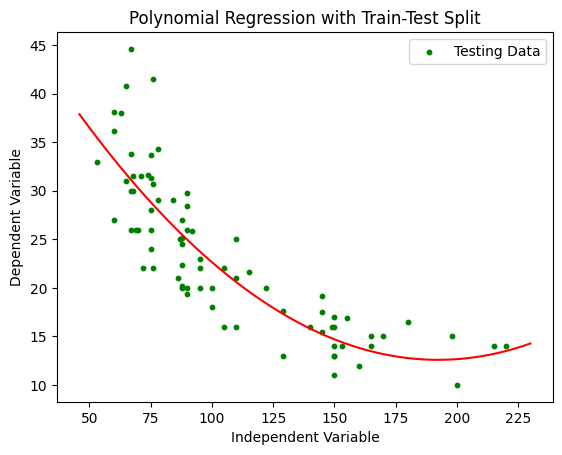

In [28]:
# Plot the results
plt.scatter(X_test, y_test, s=10, label='Testing Data', color='green')
plt.plot(X_range, poly_model.predict(poly_features.transform(X_range)),color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Polynomial Regression with Train-Test Split')
plt.legend()
plt.show()

__Observation:__

- As you can see, the regression line is able to fit the majority of data points.
- You can infer from the above implementation that non-linear inputs require non-linear models, such as the polynomial model.

Degree: 1, Independent Variables: ['horsepower']
Degree: 2, Independent Variables: ['horsepower', 'horsepower^2']
Degree: 3, Independent Variables: ['horsepower', 'horsepower^2', 'horsepower^3']
Degree: 4, Independent Variables: ['horsepower', 'horsepower^2', 'horsepower^3', 'horsepower^4']


C:\Users\prate\AppData\Local\Temp\ipykernel_22116\3959406244.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_error = pd.concat([df_error, new_row], ignore_index=True)


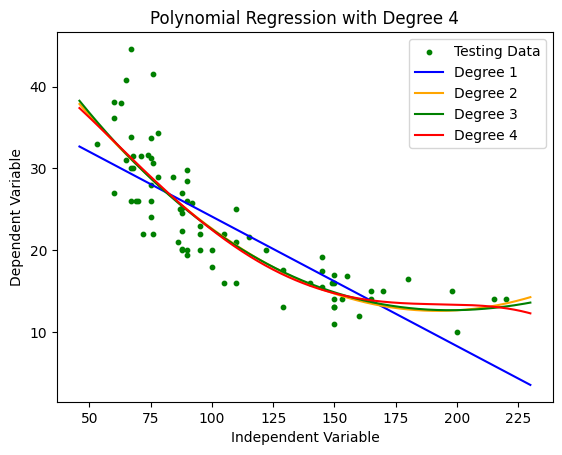

,Degree,Training Set R²,Testing Set R²,Training Set MSE,Testing Set MSE
0,1,0.595563,0.645623,24.429897,22.026387
1,2,0.673124,0.742373,19.744799,16.012895
2,3,0.673398,0.744018,19.728275,15.910651
3,4,0.674484,0.745488,19.662659,15.819253


In [49]:
color = ['blue', 'orange', 'green', 'red']
df_error = pd.DataFrame(columns=['Degree', 'Training Set R²', 'Testing Set R²', 'Training Set MSE', 'Testing Set MSE'])
plt.scatter(X_test, y_test, s=10, label='Testing Data', color='green')    
for degree in [1, 2, 3, 4]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_train_pred = poly_model.predict(X_train_poly)
    y_test_pred = poly_model.predict(X_test_poly)
    # Print feature names generated by PolynomialFeatures
    print(f"Degree: {degree}, Independent Variables: {poly_features.get_feature_names_out(X_train.columns).tolist()}")
    new_row = pd.DataFrame({
        'Degree': [degree],
        'Training Set R²': [r2_score(y_train, y_train_pred)],
        'Testing Set R²': [r2_score(y_test, y_test_pred)],
        'Training Set MSE': [mean_squared_error(y_train, y_train_pred)],
        'Testing Set MSE': [mean_squared_error(y_test, y_test_pred)]
    })
    df_error = pd.concat([df_error, new_row], ignore_index=True)

    
    #plot the results on same chart
    plt.plot(X_range, poly_model.predict(poly_features.transform(X_range)), color=color[degree-1], label=f'Degree {degree}')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title(f'Polynomial Regression with Degree {degree}')
plt.legend()
plt.show()

# Display the error DataFrame
display(df_error)
